In [36]:
import folium
import numpy as np
import pandas as pd
import os
import random

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [4]:
data = pd.read_csv('oregon_data.csv')
data

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,102649,STAT,2015,EOA,Klamath-Lake,Klamath,15-981082-16,Bass 497,B,3.20,...,Does Not Apply - Eastern OR,09/02/2015 05:00:00 PM,09/02/2015 05:05:00 PM,09/02/2015 05:00:00 PM,09/02/2015 11:00:00 PM,09/05/2015 12:00:00 AM,10/13/2015 08:39:00 AM,98,981,082
1,131239,STAT,2022,EOA,Walker Range - WRFPA,Crescent,22-991220-23,Hay Fire,A,NaN,...,NaN,NaN,08/16/2022 06:56:00 PM,NaN,NaN,08/18/2022 12:00:00 AM,08/18/2022 09:11:00 AM,99,991,220
2,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
3,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
4,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,Does Not Apply - Eastern OR,06/26/2021 04:00:00 PM,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,06/26/2021 09:58:00 PM,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,Lvl 1 Fire Season Only,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 12:14:00 PM,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,Does Not Apply - Eastern OR,06/13/2021 05:22:00 PM,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,06/17/2021 05:10:00 PM,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,Does Not Apply - Eastern OR,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 04:41:00 PM,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014


In [5]:
data.dropna(subset=['Lat_DD', 'Long_DD'], inplace=True)

In [15]:
folder_path = "/Users/christopherhardinielsen/Desktop/DTU/Kandidat/Business Analytics Advanced/Brand"
file_names = os.listdir(folder_path)
file_names = [file[:-4] for file in file_names]

In [70]:
# Create a map of Oregon
oregon_map = folium.Map(location=[44.0, -120.5], zoom_start=7)


# Plot each spot
for spot in file_names:
    lat = data.Lat_DD[data.FullFireNumber == spot].iloc[0]
    long = data.Long_DD[data.FullFireNumber == spot].iloc[0]
    folium.CircleMarker(location=[lat, long], radius=0.01, color='red', fill=True, fill_color='red').add_to(oregon_map)

# Display the map
oregon_map

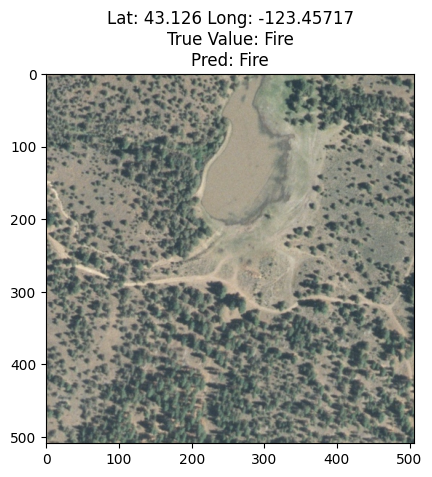

In [69]:
file = random.choice(file_names)
lat = data.Lat_DD[data.FullFireNumber == spot].iloc[0]
long = data.Long_DD[data.FullFireNumber == spot].iloc[0]

random_spot = folium.Map(location=[lat, long], zoom_start=6, width=400, height=400)
folium.CircleMarker(location=[lat, long], radius=0.01, color='red', fill=True, fill_color='red').add_to(random_spot)


image = mpimg.imread(f"{folder_path}/{file}.png")
plt.title(f'Lat: {lat} Long: {long}\nTrue Value: Fire\nPred: Fire')
plt.imshow(image)
plt.show()
random_spot